In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("House-Price.csv")

In [3]:
df.head()

price  resid_area  air_qual  room_num   age  dist1  dist2  dist3  dist4  \
0   24.0       32.31     0.538     6.575  65.2   4.35   3.81   4.18   4.01   
1   21.6       37.07     0.469     6.421  78.9   4.99   4.70   5.12   5.06   
2   34.7       37.07     0.469     7.185  61.1   5.03   4.86   5.01   4.97   
3   33.4       32.18     0.458     6.998  45.8   6.21   5.93   6.16   5.96   
4   36.2       32.18     0.458     7.147  54.2   6.16   5.86   6.37   5.86   

   teachers  poor_prop airport  n_hos_beds  n_hot_rooms waterbody  rainfall  \
0      24.7       4.98     YES       5.480      11.1920     River        23   
1      22.2       9.14      NO       7.332      12.1728      Lake        42   
2      22.2       4.03      NO       7.394     101.1200      None        38   
3      21.3       2.94     YES       9.268      11.2672      Lake        45   
4      21.3       5.33      NO       8.824      11.2896      Lake        55   

  bus_ter     parks  Sold  
0     YES  0.049347     0  
1     YES  0.046146     1  
2     YES  0.045764     0  
3     YES  0.047151     0  
4     YES  0.039474     0

In [4]:
df.describe()

price  resid_area    air_qual    room_num         age       dist1  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854   41.136779    0.554695    6.284634   68.574901    3.971996   
std      9.182176    6.860353    0.115878    0.702617   28.148861    2.108532   
min      5.000000   30.460000    0.385000    3.561000    2.900000    1.130000   
25%     17.025000   35.190000    0.449000    5.885500   45.025000    2.270000   
50%     21.200000   39.690000    0.538000    6.208500   77.500000    3.385000   
75%     25.000000   48.100000    0.624000    6.623500   94.075000    5.367500   
max     50.000000   57.740000    0.871000    8.780000  100.000000   12.320000   

            dist2       dist3       dist4    teachers   poor_prop  n_hos_beds  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  498.000000   
mean     3.628775    3.960672    3.618972   21.544466   12.653063    7.899767   
std      2.108580    2.119797    2.099203    2.164946    7.141062    1.476683   
min      0.920000    1.150000    0.730000   18.000000    1.730000    5.268000   
25%      1.940000    2.232500    1.940000   19.800000    6.950000    6.634500   
50%      3.010000    3.375000    3.070000   20.950000   11.360000    7.999000   
75%      4.992500    5.407500    4.985000   22.600000   16.955000    9.088000   
max     11.930000   12.320000   11.940000   27.400000   37.970000   10.876000   

       n_hot_rooms    rainfall       parks        Sold  
count   506.000000  506.000000  506.000000  506.000000  
mean     13.041605   39.181818    0.054454    0.454545  
std       5.238957   12.513697    0.010632    0.498422  
min      10.057600    3.000000    0.033292    0.000000  
25%      11.189800   28.000000    0.046464    0.000000  
50%      12.720000   39.000000    0.053507    0.000000  
75%      14.170800   50.000000    0.061397    1.000000  
max     101.120000   60.000000    0.086711    1.000000

<AxesSubplot:ylabel='n_hos_beds'>

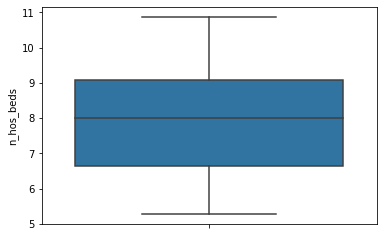

In [5]:
sns.boxplot(y="n_hos_beds",data=df)

<AxesSubplot:ylabel='n_hot_rooms'>

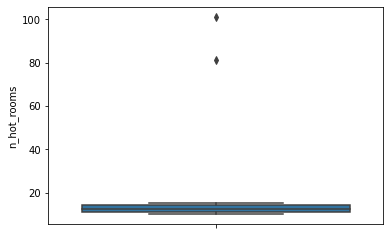

In [6]:
sns.boxplot(y="n_hot_rooms",data=df)

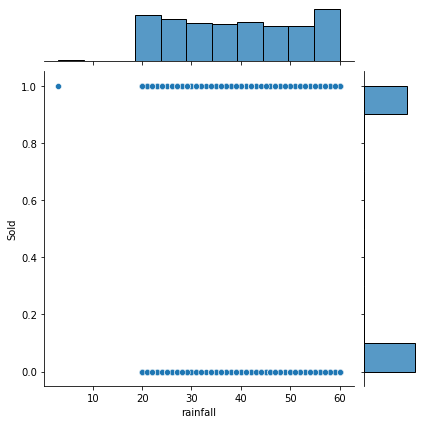

In [7]:
sns.jointplot(x="rainfall",y="Sold",data=df)

<AxesSubplot:xlabel='airport', ylabel='count'>

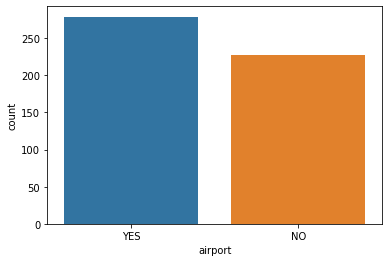

In [8]:
sns.countplot(x="airport",data=df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

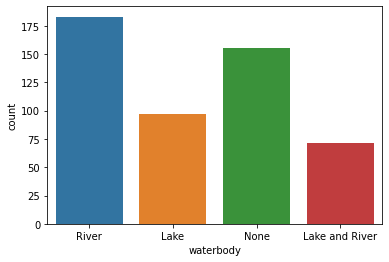

In [9]:
sns.countplot(x="waterbody",data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

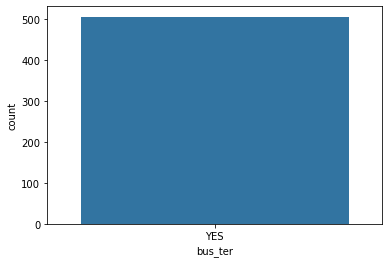

In [10]:
sns.countplot(x="bus_ter",data=df)

# Observations

1 missing n_hos_beds
2 outliers in rainfall and n_hot_rooms
3 bus_ter so not provide any additional information

# Outlier treatment 

In [11]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [12]:
 uv = np.percentile(df.n_hot_rooms,[99])[0]

In [13]:
uv

15.39952

In [14]:
df[df['n_hot_rooms']>uv]

price  resid_area  air_qual  room_num   age  dist1  dist2  dist3  dist4  \
2     34.7       37.07    0.4690     7.185  61.1   5.03   4.86   5.01   4.97   
166   50.0       49.58    0.6050     7.929  96.2   2.11   1.91   2.31   1.86   
204   50.0       32.68    0.4161     8.034  31.9   5.41   4.80   5.28   4.99   
267   50.0       33.97    0.5750     8.297  67.0   2.60   2.13   2.43   2.52   
369   50.0       48.10    0.6310     6.683  96.8   1.55   1.28   1.65   0.94   
423   13.4       48.10    0.6140     6.103  85.1   2.08   1.80   2.34   1.87   

     teachers  poor_prop airport  n_hos_beds  n_hot_rooms waterbody  rainfall  \
2        22.2       4.03      NO       7.394       101.12      None        38   
166      25.3       3.70     YES       8.300        15.40     River        37   
204      25.3       2.88     YES       8.900        15.40     River        51   
267      27.0       7.44     YES       8.000        15.40      None        42   
369      19.8       3.73     YES       6.700        15.40     River        58   
423      19.8      23.29      NO       8.268        81.12      Lake        29   

    bus_ter     parks  Sold  
2       YES  0.045764     0  
166     YES  0.052105     0  
204     YES  0.044178     0  
267     YES  0.063235     0  
369     YES  0.067477     0  
423     YES  0.063344     0

In [15]:
df.n_hot_rooms[(df.n_hot_rooms)>3*uv] = 3*uv

<ipython-input-15-fdd7c449b423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms)>3*uv] = 3*uv


In [16]:
np.percentile(df.rainfall,[1])

array([20.])

In [17]:
lv = np.percentile(df.rainfall,[1])[0]

In [18]:
df[(df.rainfall)<lv]

price  resid_area  air_qual  room_num   age  dist1  dist2  dist3  dist4  \
213   28.1       40.59     0.489     6.375  32.3   4.11   3.92   4.18   3.57   

     teachers  poor_prop airport  n_hos_beds  n_hot_rooms waterbody  rainfall  \
213      21.4       9.38     YES       7.562      10.2248      None         3   

    bus_ter     parks  Sold  
213     YES  0.044019     1

In [19]:
df.rainfall[(df.rainfall)<0.3*lv]=0.3*lv

<ipython-input-19-754592b29d34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall)<0.3*lv]=0.3*lv


In [20]:
df.describe()

price  resid_area    air_qual    room_num         age       dist1  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854   41.136779    0.554695    6.284634   68.574901    3.971996   
std      9.182176    6.860353    0.115878    0.702617   28.148861    2.108532   
min      5.000000   30.460000    0.385000    3.561000    2.900000    1.130000   
25%     17.025000   35.190000    0.449000    5.885500   45.025000    2.270000   
50%     21.200000   39.690000    0.538000    6.208500   77.500000    3.385000   
75%     25.000000   48.100000    0.624000    6.623500   94.075000    5.367500   
max     50.000000   57.740000    0.871000    8.780000  100.000000   12.320000   

            dist2       dist3       dist4    teachers   poor_prop  n_hos_beds  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  498.000000   
mean     3.628775    3.960672    3.618972   21.544466   12.653063    7.899767   
std      2.108580    2.119797    2.099203    2.164946    7.141062    1.476683   
min      0.920000    1.150000    0.730000   18.000000    1.730000    5.268000   
25%      1.940000    2.232500    1.940000   19.800000    6.950000    6.634500   
50%      3.010000    3.375000    3.070000   20.950000   11.360000    7.999000   
75%      4.992500    5.407500    4.985000   22.600000   16.955000    9.088000   
max     11.930000   12.320000   11.940000   27.400000   37.970000   10.876000   

       n_hot_rooms    rainfall       parks        Sold  
count   506.000000  506.000000  506.000000  506.000000  
mean     12.864050   39.187747    0.054454    0.454545  
std       2.688778   12.497221    0.010632    0.498422  
min      10.057600    6.000000    0.033292    0.000000  
25%      11.189800   28.000000    0.046464    0.000000  
50%      12.720000   39.000000    0.053507    0.000000  
75%      14.170800   50.000000    0.061397    1.000000  
max      46.198560   60.000000    0.086711    1.000000

# Missing value treatment 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [22]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

# Variable filtering

In [23]:
df["dist_avg"] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [24]:
del df["dist1"]

In [25]:
del df["dist2"]
del df["dist3"]
del df["dist4"]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   teachers     506 non-null    float64
 6   poor_prop    506 non-null    float64
 7   airport      506 non-null    object 
 8   n_hos_beds   506 non-null    float64
 9   n_hot_rooms  506 non-null    float64
 10  waterbody    506 non-null    object 
 11  rainfall     506 non-null    int64  
 12  bus_ter      506 non-null    object 
 13  parks        506 non-null    float64
 14  Sold         506 non-null    int64  
 15  dist_avg     506 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory usage: 63.4+ KB


In [27]:
del df["bus_ter"]

In [28]:
df = pd.get_dummies(df)

In [29]:
df.head()

price  resid_area  air_qual  room_num   age  teachers  poor_prop  \
0   24.0       32.31     0.538     6.575  65.2      24.7       4.98   
1   21.6       37.07     0.469     6.421  78.9      22.2       9.14   
2   34.7       37.07     0.469     7.185  61.1      22.2       4.03   
3   33.4       32.18     0.458     6.998  45.8      21.3       2.94   
4   36.2       32.18     0.458     7.147  54.2      21.3       5.33   

   n_hos_beds  n_hot_rooms  rainfall     parks  Sold  dist_avg  airport_NO  \
0       5.480     11.19200        23  0.049347     0    4.0875           0   
1       7.332     12.17280        42  0.046146     1    4.9675           1   
2       7.394     46.19856        38  0.045764     0    4.9675           1   
3       9.268     11.26720        45  0.047151     0    6.0650           0   
4       8.824     11.28960        55  0.039474     0    6.0625           1   

   airport_YES  waterbody_Lake  waterbody_Lake and River  waterbody_None  \
0            1               0                         0               0   
1            0               1                         0               0   
2            0               0                         0               1   
3            1               1                         0               0   
4            0               1                         0               0   

   waterbody_River  
0                1  
1                0  
2                0  
3                0  
4                0

In [30]:
del df["airport_NO"]
del df["waterbody_None"]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     506 non-null    float64
 1   resid_area                506 non-null    float64
 2   air_qual                  506 non-null    float64
 3   room_num                  506 non-null    float64
 4   age                       506 non-null    float64
 5   teachers                  506 non-null    float64
 6   poor_prop                 506 non-null    float64
 7   n_hos_beds                506 non-null    float64
 8   n_hot_rooms               506 non-null    float64
 9   rainfall                  506 non-null    int64  
 10  parks                     506 non-null    float64
 11  Sold                      506 non-null    int64  
 12  dist_avg                  506 non-null    float64
 13  airport_YES               506 non-null    uint8  
 14  waterbody_

# Logistic Regression

In [32]:
X = df[["price"]]

In [33]:
y = df['Sold']

In [34]:
X.head()

price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2

In [35]:
 from sklearn.linear_model import LogisticRegression as lrs

In [36]:
clf_lrs = lrs()

In [37]:
clf_lrs.fit(X,y)

LogisticRegression()

In [38]:
clf_lrs.coef_

array([[-0.03571865]])

B1

In [39]:
clf_lrs.intercept_

array([0.61477516])

Bo

In [40]:
import statsmodels.api as sn

In [41]:
X_cons = sn.add_constant(X)

/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
X_cons.head()

const  price
0    1.0   24.0
1    1.0   21.6
2    1.0   34.7
3    1.0   33.4
4    1.0   36.2

In [43]:
import statsmodels.discrete.discrete_model as sm

In [44]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [45]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                 0.01788
Time:                        12:44:23   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

# Logistic with multiple predictors 

In [46]:
X = df.loc[:,df.columns != "Sold"]

In [47]:
y = df["Sold"]

In [48]:
clf_lr = lrs()

In [49]:
clf_lr.fit(X,y)

/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
clf_lr.coef_

array([[-0.24636736, -0.01730039, -0.11021223,  0.86271331, -0.00599887,
         0.22817804, -0.21023085,  0.18005151, -0.09084813, -0.007043  ,
        -0.0049929 , -0.32612251, -0.10522649, -0.09488235, -0.01512574,
         0.20182454]])

In [51]:
clf_lr.intercept_

array([0.01671405])

In [52]:
X_cons = sn.add_constant(X)

/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.556433
         Iterations 6


In [54]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.1924
Time:                        12:44:25   Log-Likelihood:                -281.56
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 9.930e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1383      2.649     -0.807      0.420      -7.331       3.054
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0192      0.027      0.720      0.471      -0.033       0.071
air_qual                    -7.4183      2.691     -2.757      0.006     -12.693      -2.144
room_num                     1.1067      0.277      4.001      0.000       0.565       1.649
age                         -0.0020      0.007     -0.302      0.762      -0.015       0.011
teachers                     0.3150      0.064      4.937      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1760      0.071      2.467      0.014       0.036       0.316
n_hot_rooms                 -0.0742      0.052     -1.439      0.150      -0.175       0.027
rainfall                    -0.0033      0.008     -0.394      0.693      -0.020       0.013
parks                       29.1089     24.177      1.204      0.229     -18.277      76.495
dist_avg                    -0.4017      0.098     -4.118      0.000      -0.593      -0.211
airport_YES                 -0.1524      0.211     -0.723      0.469      -0.565       0.261
waterbody_Lake              -0.1032      0.304     -0.340      0.734      -0.698       0.492
waterbody_Lake and River    -0.0626      0.328     -0.191      0.849      -0.705       0.580
waterbody_River              0.2394      0.256      0.937      0.349      -0.262       0.740
============================================================================================
"""

In [55]:
clf_lr.predict_proba(X)

array([[0.12706787, 0.87293213],
       [0.39754438, 0.60245562],
       [0.98070621, 0.01929379],
       ...,
       [0.28590986, 0.71409014],
       [0.2805668 , 0.7194332 ],
       [0.16346993, 0.83653007]])

In [56]:
y_pred = clf_lr.predict(X)
print(y_pred)

[1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0
 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 

In [57]:
y_pred_03 = (clf_lr.predict_proba(X)[:,1] >= 0.3)

In [58]:
y_pred_03

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y,y_pred)

array([[196,  80],
       [ 81, 149]])

x-special/nautilus-clipboard
copy
file:///home/sahil/Documents/datascience_starttech/house%20sold%20within%203%20months%20or%20not/confusion%20matrix.png


In [61]:
confusion_matrix(y,y_pred_03)

array([[121, 155],
       [ 18, 212]])

In [62]:
from sklearn.metrics import precision_score, recall_score

In [63]:
precision_score(y,y_pred)

0.6506550218340611

In [64]:
recall_score(y,y_pred)

0.6478260869565218

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(y,y_pred)

0.6789855072463769

# Linear Discriminant Analysis

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [68]:
clf_lda = lda()
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [69]:
y_pred_lda = clf_lda.predict(X)

In [70]:
confusion_matrix(y,y_pred_lda)

array([[192,  84],
       [ 79, 151]])

In [71]:
precision_score(y,y_pred_lda)

0.6425531914893617

In [72]:
recall_score(y,y_pred_lda)

0.6565217391304348

In [73]:
roc_auc_score(y,y_pred_lda)

0.6760869565217391

# Checking accuracy with test set

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [76]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [77]:
clf_LR = lrs()
clf_LR.fit(X_train,y_train)

/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
y_test_pred = clf_LR.predict(X_test)

In [79]:
confusion_matrix(y_test,y_test_pred)

array([[37, 21],
       [14, 30]])

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test,y_test_pred)

0.6568627450980392

# K-Nearest Neighbors 

In [82]:
from sklearn import preprocessing

In [83]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [84]:
scaler = preprocessing.StandardScaler().fit(X_test)

In [85]:
X_test_s = scaler.transform(X_test)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [87]:
confusion_matrix(y_test,clf_knn_1.predict(X_test_s))

array([[30, 28],
       [19, 25]])

In [88]:
accuracy_score(y_test,clf_knn_1.predict(X_test_s))

0.5392156862745098

In [89]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
accuracy_score(y_test,clf_knn_3.predict(X_test_s))

0.5392156862745098

In [91]:
confusion_matrix(y_test,clf_knn_3.predict(X_test_s))

array([[32, 26],
       [21, 23]])

# single model with multiple value of k


In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
params = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10]}

In [94]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [102]:
grid_search_cv.fit(X_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [103]:
grid_search_cv.best_params_

{'n_neighbors': 9}

In [104]:
optimized_KNN = grid_search_cv.best_estimator_

In [105]:
optimized_KNN

KNeighborsClassifier(n_neighbors=9)

In [106]:
y_test_predK = optimized_KNN.predict(X_test_s)

In [107]:
confusion_matrix(y_test,y_test_predK)

array([[36, 22],
       [18, 26]])

In [108]:
accuracy_score(y_test,y_test_predK)

0.6078431372549019